<a href="https://colab.research.google.com/github/Sachinthana-Pathiranage/Machine_Larning_CM2604_Bank_Data/blob/main/ML_CW_AI%26DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis and Predictive Modeling for Classification Tasks Using Machine Learning and Neural Networks

---

# Name - Sachinthana

# RGU - 2330931

# IIT - 20231122

In [144]:
#1) Key Steps:
# 1. Load the dataset and perform initial exploration (dimensions, missing values, data types).
# 2. Identify categorical and numerical features and distinguish between discrete and continuous ones.
# 3. Visualize distributions of features (continuous and categorical) using histograms and boxplots.
# 4. Detect outliers using boxplots and analyze correlations (numerical with heatmaps, categorical with Cramér's V).
# 5. Encode the target variable for binary classification and analyze its correlation with numerical features.
# 6. All visualizations use modern color schemes for better aesthetics and clarity.


In [2]:
# Import essential libraries for data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import statistical tools
from scipy.stats import chi2_contingency

# Data preprocessing utilities
from sklearn.preprocessing import LabelEncoder

# Resampling technique for imbalanced datasets
from imblearn.over_sampling import SMOTE

# Splitting datasets into training and testing sets
from sklearn.model_selection import train_test_split

# Importing machine learning models
from sklearn.ensemble import RandomForestClassifier

# Metrics for model performance evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report
)
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

# Deep learning framework
from keras.models import Sequential
from keras.layers import Dense
from keras import Input


# Exploratory Data Analysis (EDA) for Banking Dataset

In [5]:
# Step 1: Load and Examine the Dataset

# Read the dataset from a CSV file using ';' as a delimiter
bank_data = pd.read_csv('bank-full.csv', sep=';')

# Display the first few rows of the dataset in a table format
print("### First 5 rows of the dataset ###")
display(bank_data.head())  # This will display the first 5 rows in table format in Jupyter/Colab

# Print the data types of all columns in a table format
print("\n### Data Types of Each Column ###")
data_types_table = pd.DataFrame(bank_data.dtypes, columns=['Data Type'])
display(data_types_table)

# Display the number of rows and columns in the dataset
print(f"\n### Dataset Dimensions ###")
dimensions_table = pd.DataFrame({
    'Description': ['Number of Rows', 'Number of Columns'],
    'Count': [bank_data.shape[0], bank_data.shape[1]]
})
display(dimensions_table)


### First 5 rows of the dataset ###


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no


### Data Types of Each Column ###


Data Type
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object


### Dataset Dimensions ###


Description  Count
0     Number of Rows  45211
1  Number of Columns     17

Check for Missing Values

In [6]:
# Step 2: Check for Missing Values
missing_values = bank_data.isnull().sum()

# Display missing values in a clear table format
print("### Missing Values in Each Column ###")
missing_values_table = pd.DataFrame({
    'Column Name': missing_values.index,
    'Missing Values Count': missing_values.values,
    'Percentage of Missing Values': (missing_values.values / bank_data.shape[0]) * 100
})

# Display the missing values table
display(missing_values_table)

### Missing Values in Each Column ###


Column Name  Missing Values Count  Percentage of Missing Values
0          age                     0                           0.0
1          job                     0                           0.0
2      marital                     0                           0.0
3    education                     0                           0.0
4      default                     0                           0.0
5      balance                     0                           0.0
6      housing                     0                           0.0
7         loan                     0                           0.0
8      contact                     0                           0.0
9          day                     0                           0.0
10       month                     0                           0.0
11    duration                     0                           0.0
12    campaign                     0                           0.0
13       pdays                     0                           0.0
14    previous                     0                           0.0
15    poutcome                     0                           0.0
16           y                     0                           0.0

Identify Categorical and Numerical Features

In [23]:
# Step 3: Identify Categorical and Numerical Features

# S1: Extract Categorical Columns (excluding the target variable)
categorical_cols = bank_data.select_dtypes(include='object').columns[:-1]  # Exclude the target column
print("Categorical Features (excluding target variable)")
print(categorical_cols.tolist(), end="\n\n")

# S2: Extract Numerical Columns
numeric_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Features")
print(numeric_cols.tolist())

Categorical Features (excluding target variable)
[]

Numerical Features
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


Separate Discrete and Continuous Features

In [8]:
# Step 4: Separate Discrete and Continuous Features
discrete_cols = [col for col in numeric_cols if bank_data[col].nunique() <= 25]
continuous_cols = [col for col in numeric_cols if bank_data[col].nunique() > 25]

# Display Discrete and Continuous Numerical Features in a Clear Format
print("### Discrete Numerical Features (with <= 25 unique values) ###")
print(discrete_cols if discrete_cols else "No discrete features found.", end="\n\n")

print("### Continuous Numerical Features (with > 25 unique values) ###")
print(continuous_cols if continuous_cols else "No continuous features found.")

### Discrete Numerical Features (with <= 25 unique values) ###
No discrete features found.

### Continuous Numerical Features (with > 25 unique values) ###
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Analyze Unique Values for Specific Features

In [9]:
# Define a list of specific features you want to analyze
specific_features = ['job', 'marital', 'education', 'pdays', 'age']

# Create a dictionary to store the unique values for each feature
unique_values = {}

# Loop through the selected features and gather unique values
for feature in specific_features:
    unique_values[feature] = bank_data[feature].unique()

# Display the unique values for the selected features
print("### Unique Values for Specific Features ###\n")
for feature, values in unique_values.items():
    print(f"Feature: {feature}")
    print(f"Unique Values: {values}")
    print(f"Number of Unique Values: {len(values)}\n")

### Unique Values for Specific Features ###

Feature: job
Unique Values: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Number of Unique Values: 12

Feature: marital
Unique Values: ['married' 'single' 'divorced']
Number of Unique Values: 3

Feature: education
Unique Values: ['tertiary' 'secondary' 'unknown' 'primary']
Number of Unique Values: 4

Feature: pdays
Unique Values: [ -1 151 166  91  86 143 147  89 140 176 101 174 170 167 195 165 129 188
 196 172 118 119 104 171 117 164 132 131 123 159 186 111 115 116 173 178
 110 152  96 103 150 175 193 181 185 154 145 138 126 180 109 158 168  97
 182 127 130 194 125 105 102  26 179  28 183 155 112 120 137 124 187 190
 113 162 134 169 189   8 144 191 184 177   5  99 133  93  92  10 100 156
 198 106 153 146 128   7 121 160 107  90  27 197 136 139 122 157 149 135
  30 114  98 192 163  34  95 141  31 199  94 108  29 268 247 253 226 244
 239 245

Frequency Counts for Categorical Features

In [10]:
# Step 5: Frequency Counts for Categorical Features
print("### Frequency Counts for Categorical Features ###\n")

# Loop through each categorical column to display the value counts and percentage
for column in categorical_cols:
    print(f"\n### {column} Value Counts ###")

    # Get the frequency count of each unique value
    value_counts = bank_data[column].value_counts()

    # Get the percentage of each category
    percentage_counts = bank_data[column].value_counts(normalize=True) * 100

    # Create a DataFrame to display both counts and percentages
    frequency_table = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentage_counts.round(2)  # Rounded to 2 decimal places for clarity
    })

    # Display the frequency table
    display(frequency_table)

### Frequency Counts for Categorical Features ###


### job Value Counts ###


Count  Percentage
job                             
blue-collar     9732       21.53
management      9458       20.92
technician      7597       16.80
admin.          5171       11.44
services        4154        9.19
retired         2264        5.01
self-employed   1579        3.49
entrepreneur    1487        3.29
unemployed      1303        2.88
housemaid       1240        2.74
student          938        2.07
unknown          288        0.64


### marital Value Counts ###


Count  Percentage
marital                    
married   27214       60.19
single    12790       28.29
divorced   5207       11.52


### education Value Counts ###


Count  Percentage
education                   
secondary  23202       51.32
tertiary   13301       29.42
primary     6851       15.15
unknown     1857        4.11


### default Value Counts ###


Count  Percentage
default                   
no       44396        98.2
yes        815         1.8


### housing Value Counts ###


Count  Percentage
housing                   
yes      25130       55.58
no       20081       44.42


### loan Value Counts ###


Count  Percentage
loan                   
no    37967       83.98
yes    7244       16.02


### contact Value Counts ###


Count  Percentage
contact                     
cellular   29285       64.77
unknown    13020       28.80
telephone   2906        6.43


### month Value Counts ###


Count  Percentage
month                   
may    13766       30.45
jul     6895       15.25
aug     6247       13.82
jun     5341       11.81
nov     3970        8.78
apr     2932        6.49
feb     2649        5.86
jan     1403        3.10
oct      738        1.63
sep      579        1.28
mar      477        1.06
dec      214        0.47


### poutcome Value Counts ###


Count  Percentage
poutcome                   
unknown   36959       81.75
failure    4901       10.84
other      1840        4.07
success    1511        3.34

Visualize Categorical Feature Distributions

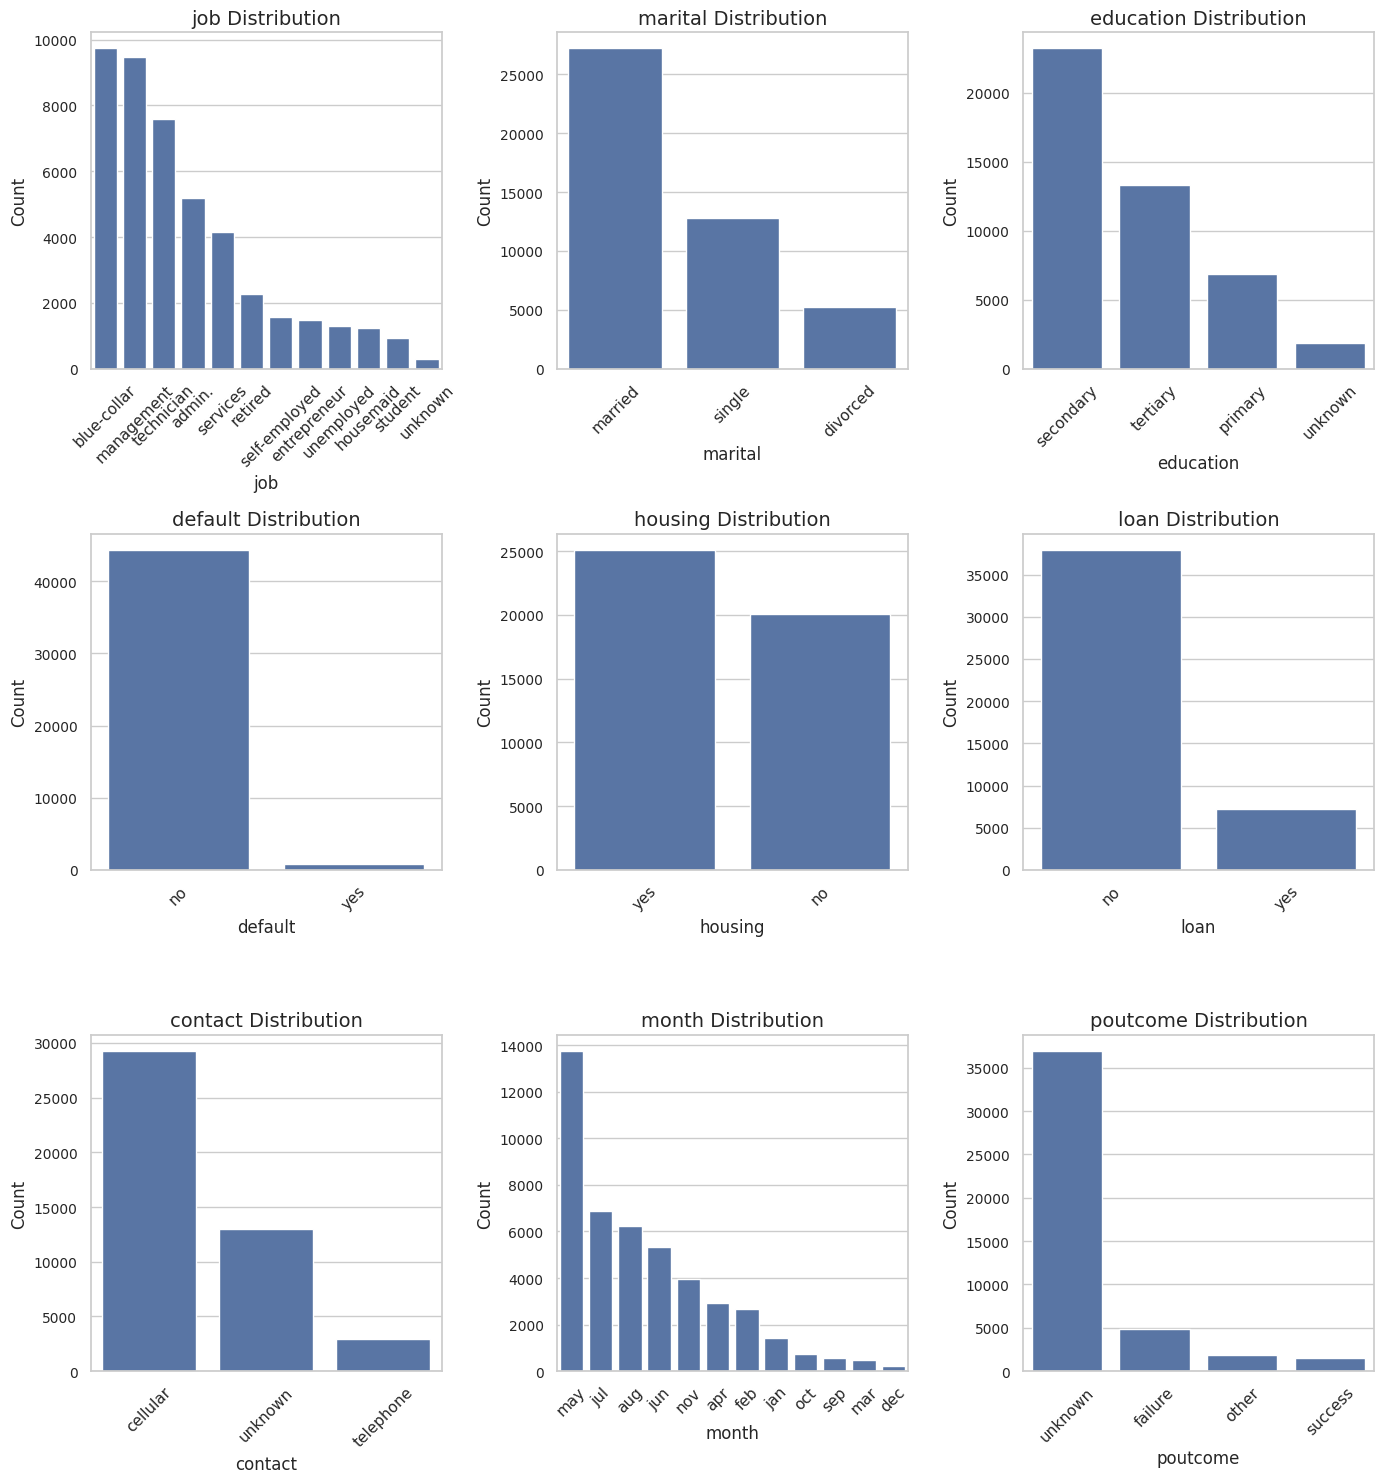

In [152]:
# Step 6: Visualizing Categorical Feature Distributions with Advanced Color Scheme
# Set up the figure with dynamically calculated rows and columns for subplots
n_cols = 3  # Number of columns for the subplots grid
n_rows = (len(categorical_cols) // n_cols) + (len(categorical_cols) % n_cols > 0)  # Calculate rows needed

fig, axs = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows))  # Adjust figure size dynamically
axs = axs.flatten()

# Set a custom advanced color palette (e.g., "Set2" for a pastel color palette)
sns.set_palette("Set2")

# Loop through categorical columns to create count plots
for idx, col in enumerate(categorical_cols):
    sns.countplot(data=bank_data, x=col, order=bank_data[col].value_counts().index, ax=axs[idx])
    axs[idx].set_title(f"{col} Distribution", fontsize=14)
    axs[idx].set_xlabel(col, fontsize=12)
    axs[idx].set_ylabel("Count", fontsize=12)
    axs[idx].tick_params(axis='x', rotation=45)
    axs[idx].tick_params(axis='y', labelsize=10)

# Hide any empty subplots if there are fewer than 9 categorical columns
for idx in range(len(categorical_cols), len(axs)):
    axs[idx].axis('off')

# Adjust the layout and spacing between plots
plt.tight_layout()
plt.show()

 Summary Statistics for Numerical Features

In [153]:
# Step 7: Descriptive Statistics for Numerical Features
# Generate the summary statistics for numerical features
numerical_summary = bank_data.describe()

# Display the numerical summary
print("### Numerical Features Summary ###\n")
print(numerical_summary)

#Insights for Numerical Features
# 1. Skewness: Measures the asymmetry of the distribution of values
skewness = bank_data[numeric_cols].skew()

# 2. Kurtosis: Measures the "tailedness" of the distribution
kurtosis = bank_data[numeric_cols].kurt()

# 3. Correlations between numerical features
correlations = bank_data[numeric_cols].corr()

# Display skewness and kurtosis
print("\n### Skewness for Numerical Features ###")
print(skewness)

print("\n### Kurtosis for Numerical Features ###")
print(kurtosis)


### Numerical Features Summary ###

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.

Visualize Continuous Feature Distributions

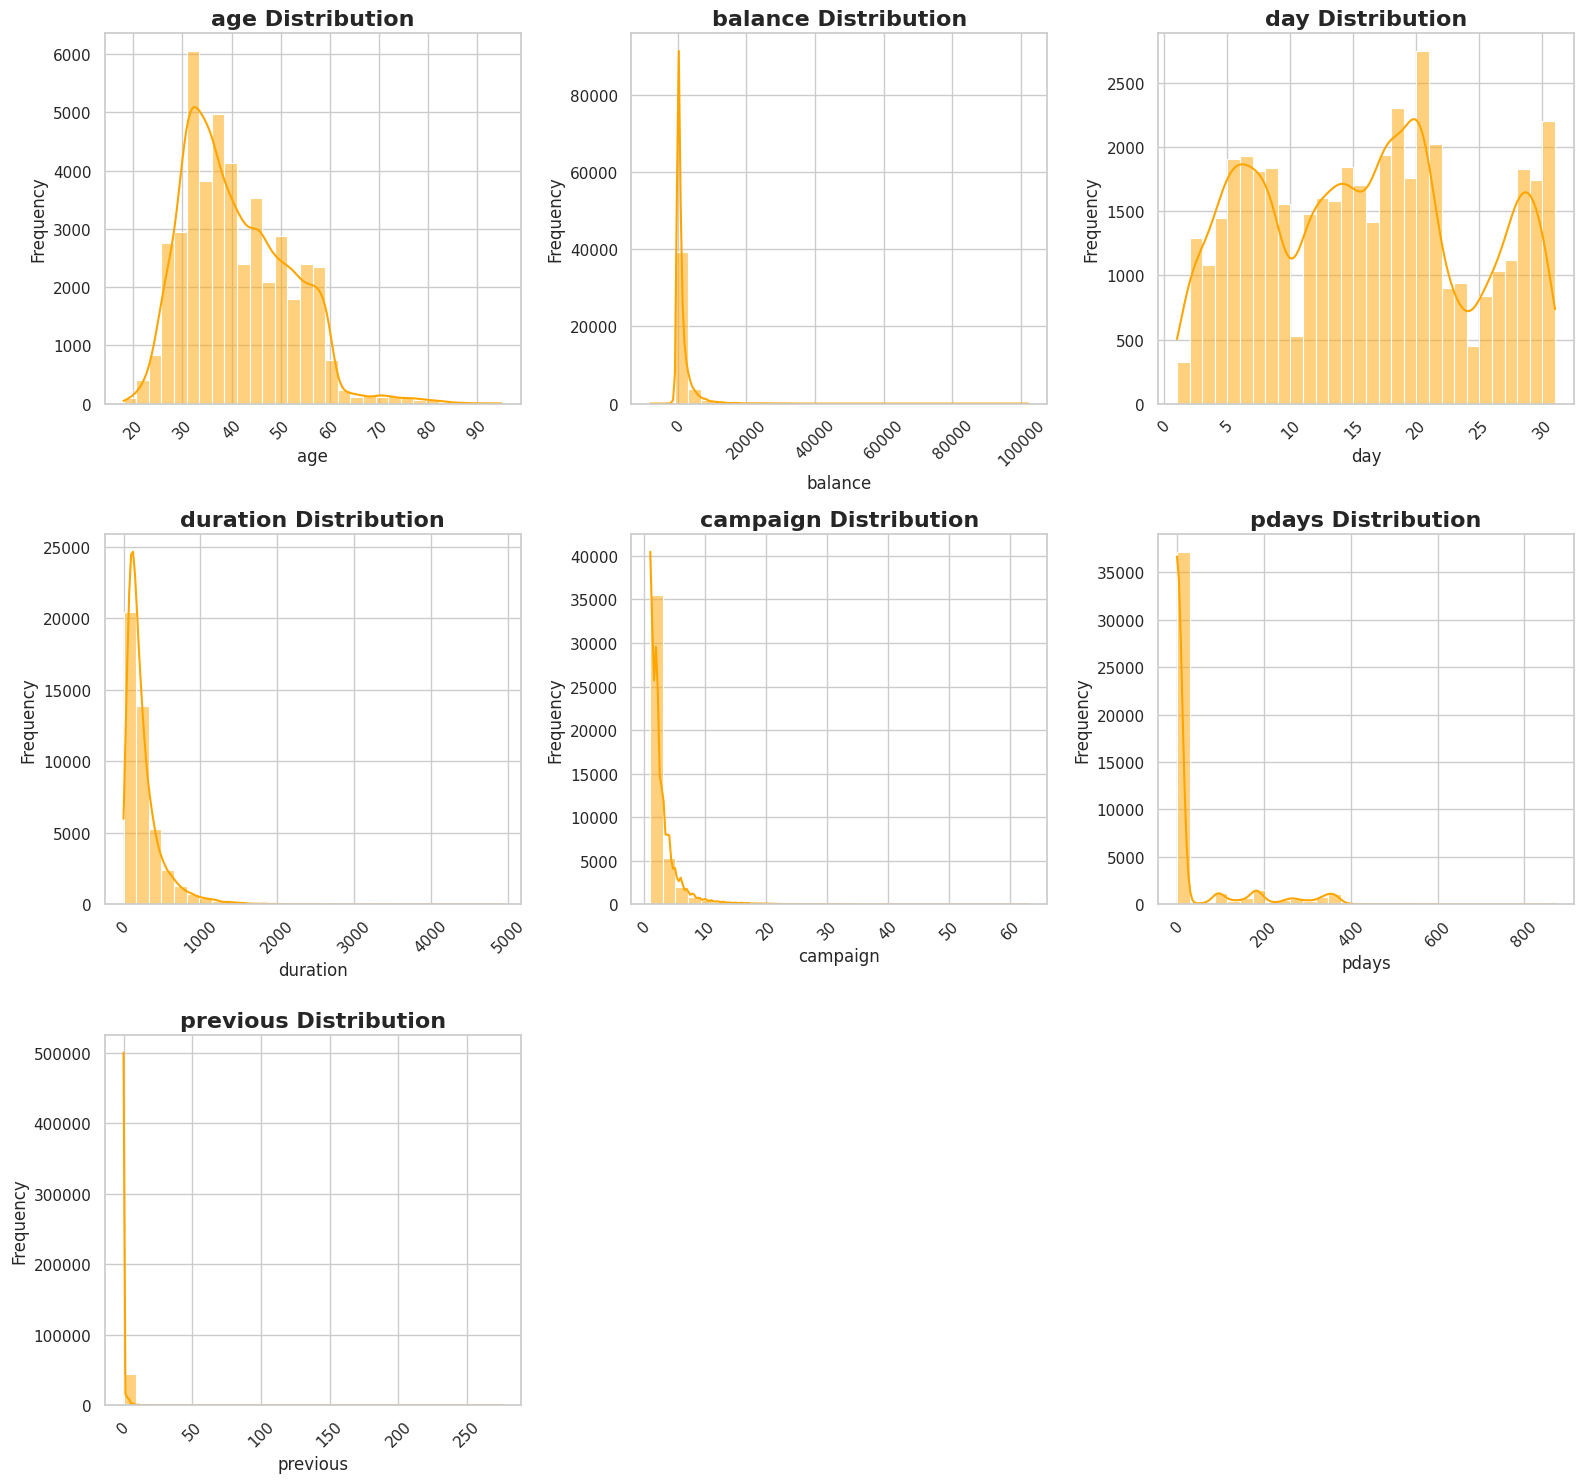

In [154]:
# Step 8: Continuous Feature Distributions

# Set up the plot aesthetics
sns.set(style="whitegrid")

# -------------------------- Numerical Feature Distribution --------------------------
# Dynamically calculate the number of rows and columns for subplots
num_features = len(numeric_cols)
rows = math.ceil(num_features / 3)  # Assuming 3 columns per row

fig, axes = plt.subplots(rows, 3, figsize=(16, rows * 5))  # Adjust grid size based on features
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot histograms with KDE for each numerical feature
for i, col in enumerate(numeric_cols):
    sns.histplot(bank_data[col], kde=True, color='orange', ax=axes[i], bins=30)
    axes[i].set_title(f"{col} Distribution", fontsize=16, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused axes (in case there are fewer numerical features than subplots)
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Adjust layout to make sure all plots fit well
plt.tight_layout()
plt.show()

Analyze and Plot Discrete Numerical Features (e.g., 'day')

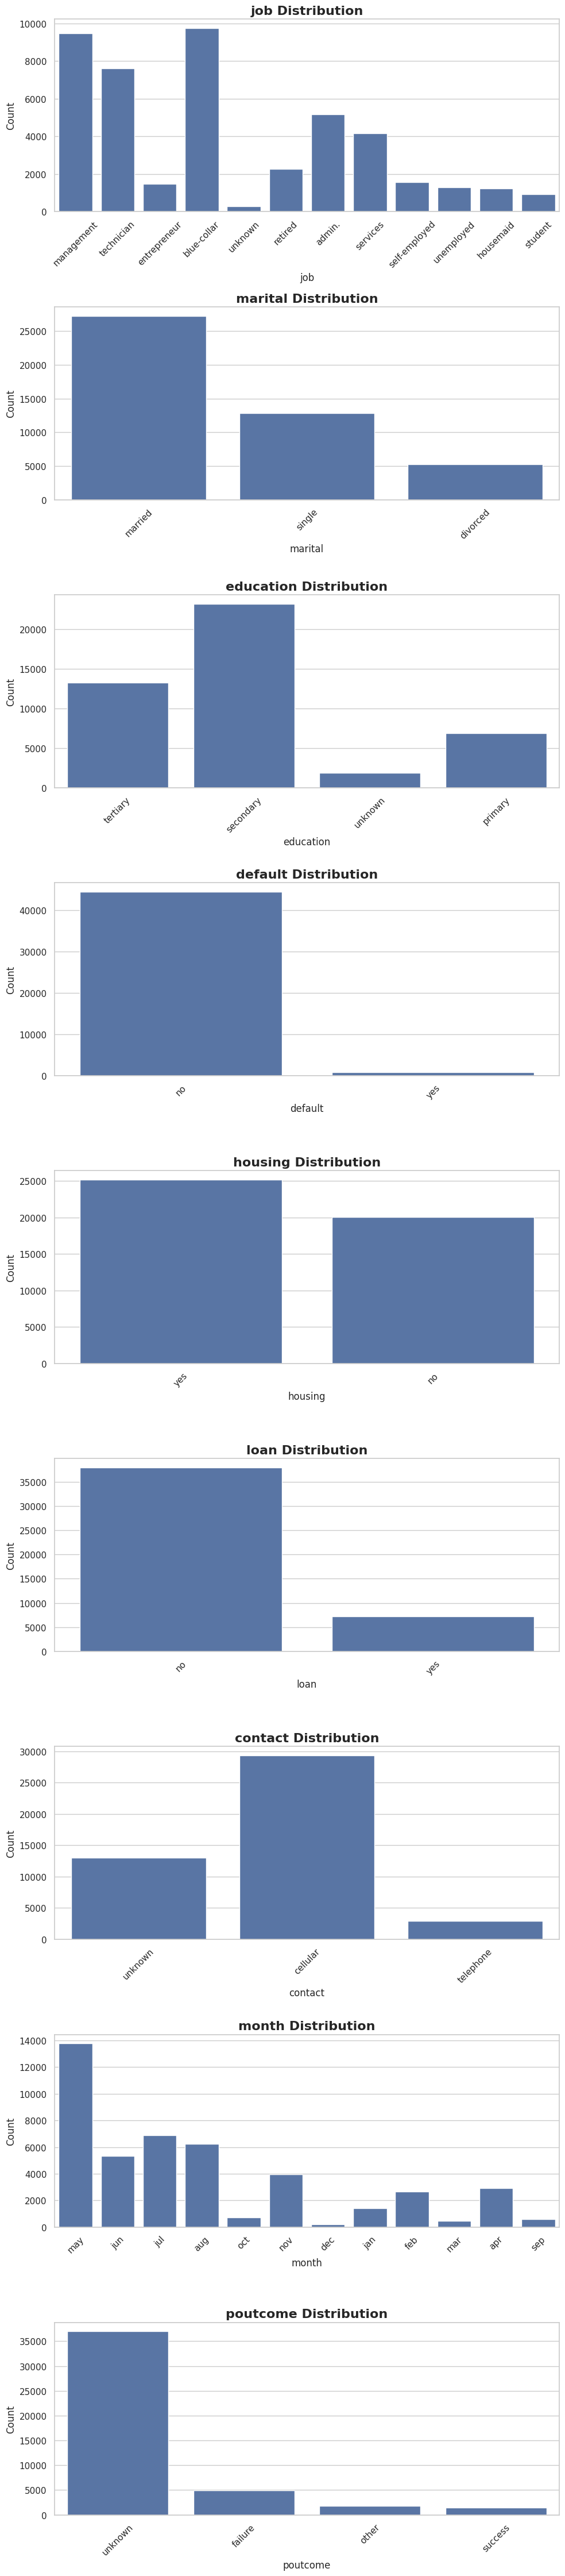

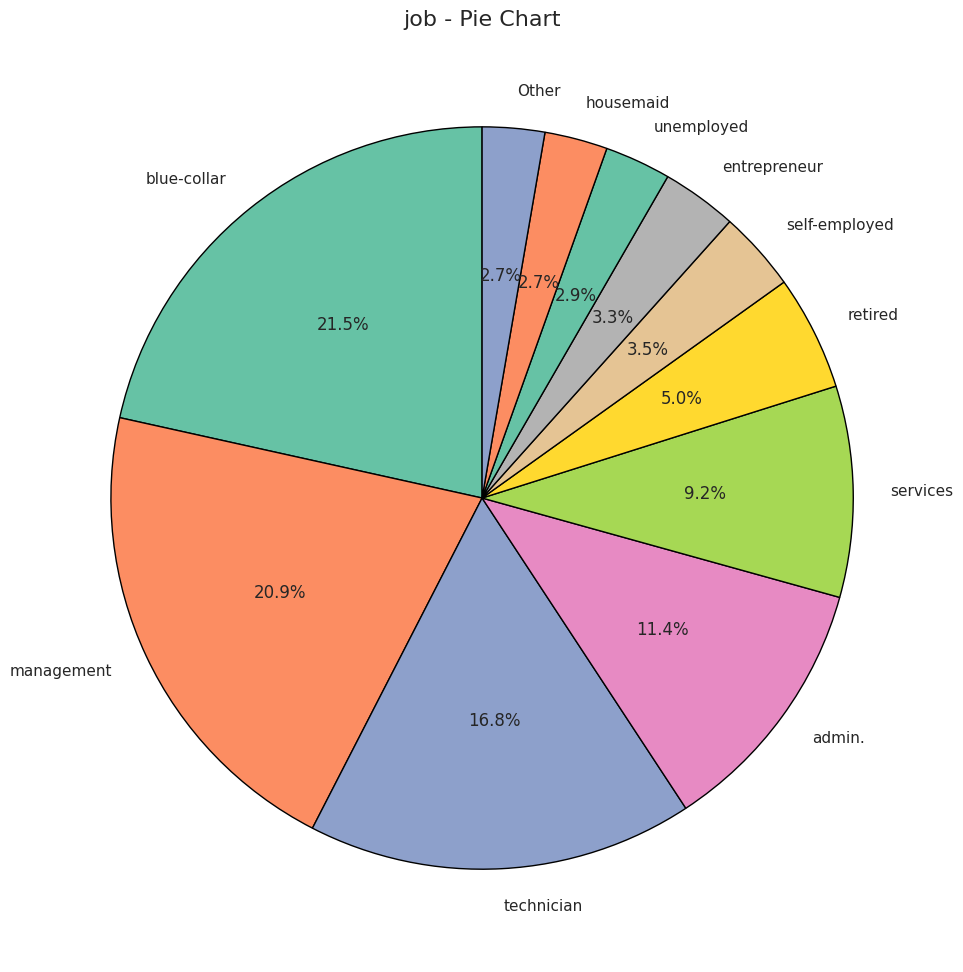

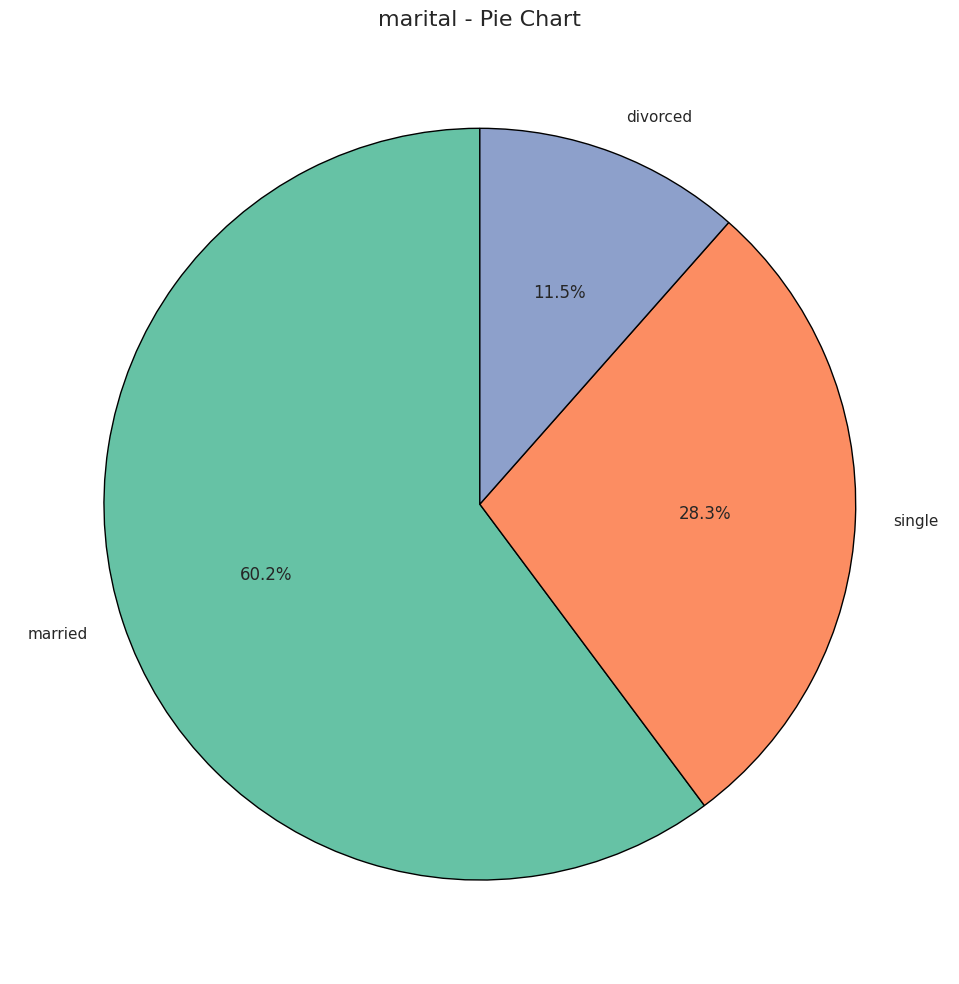

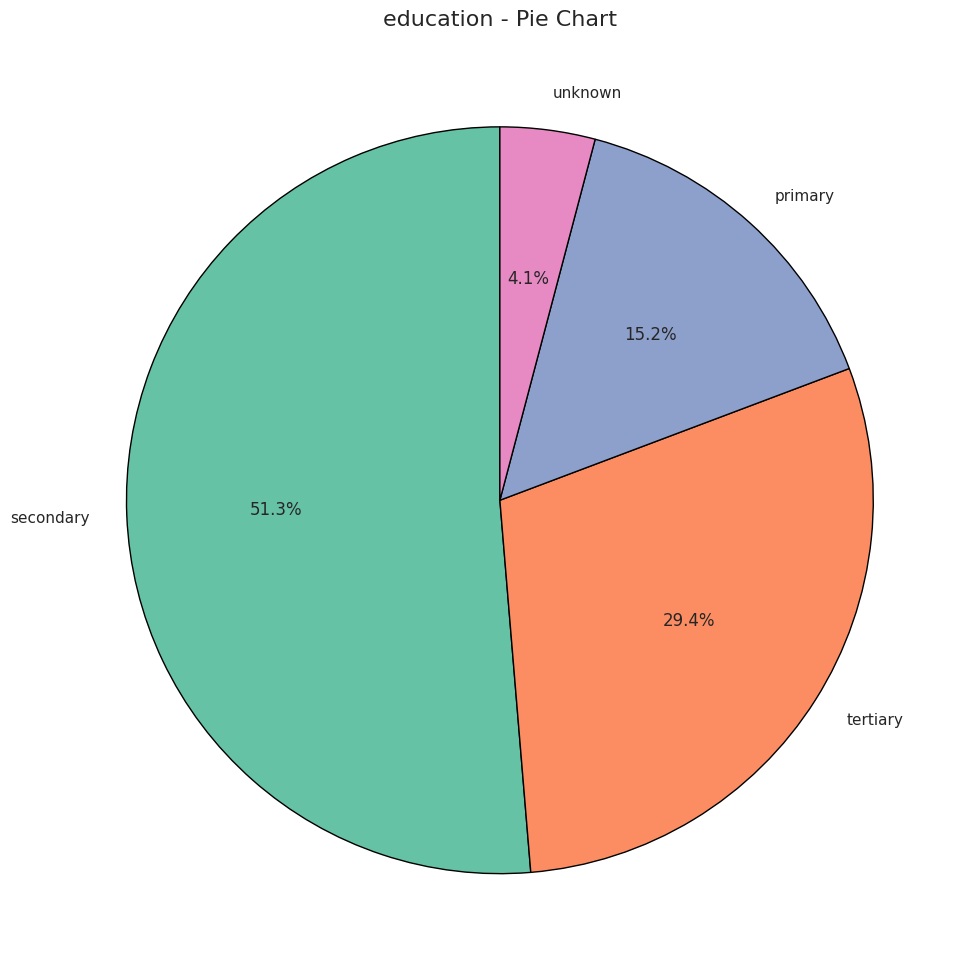

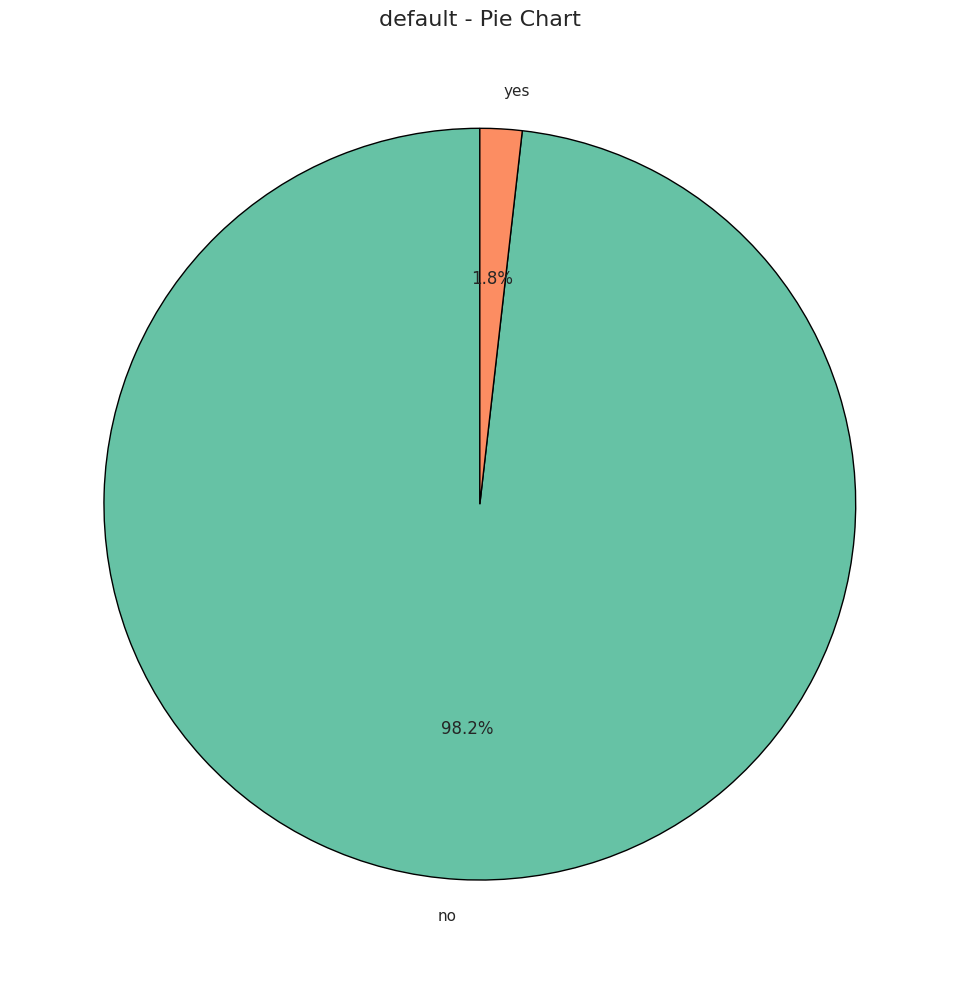

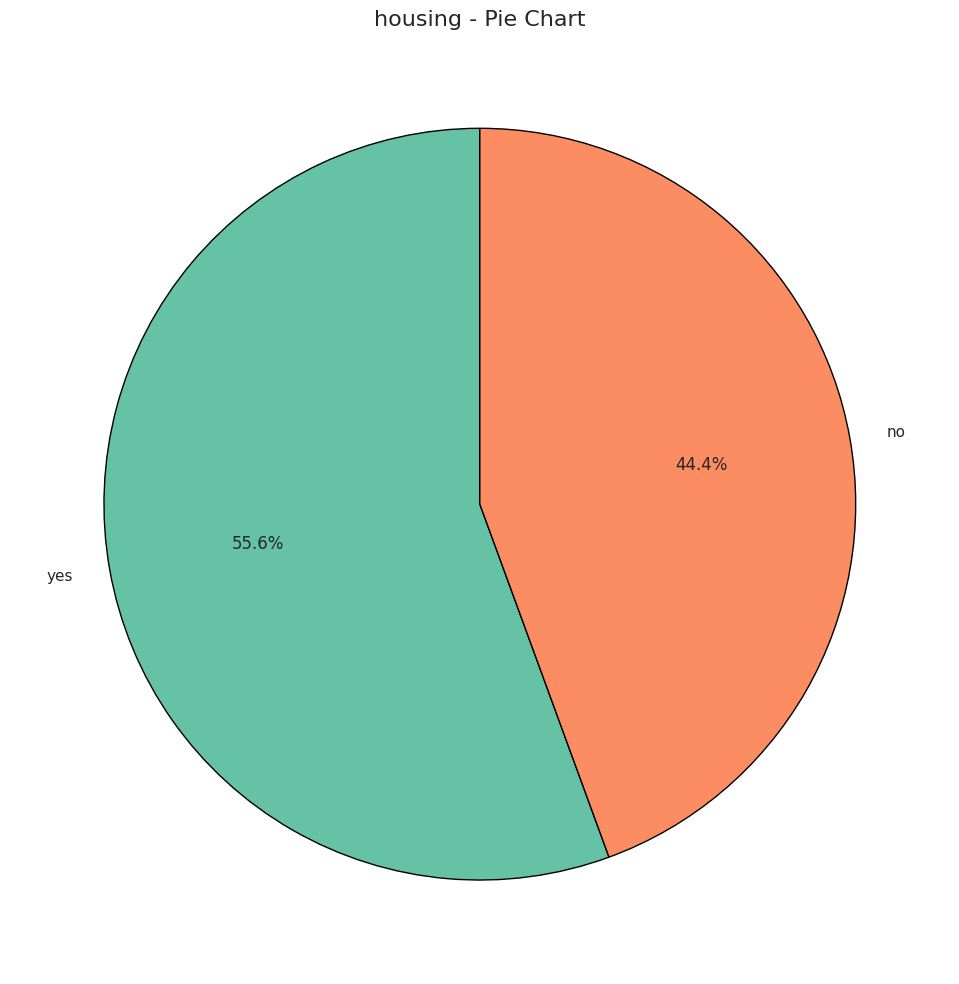

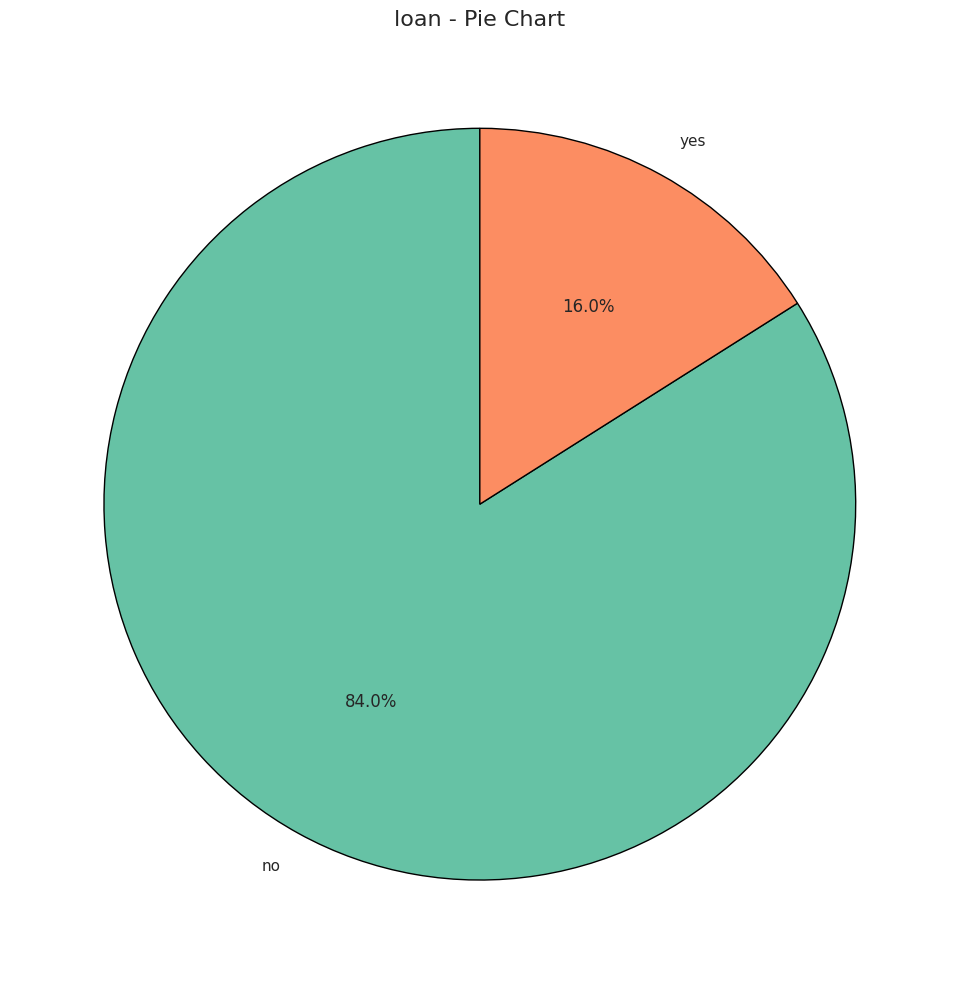

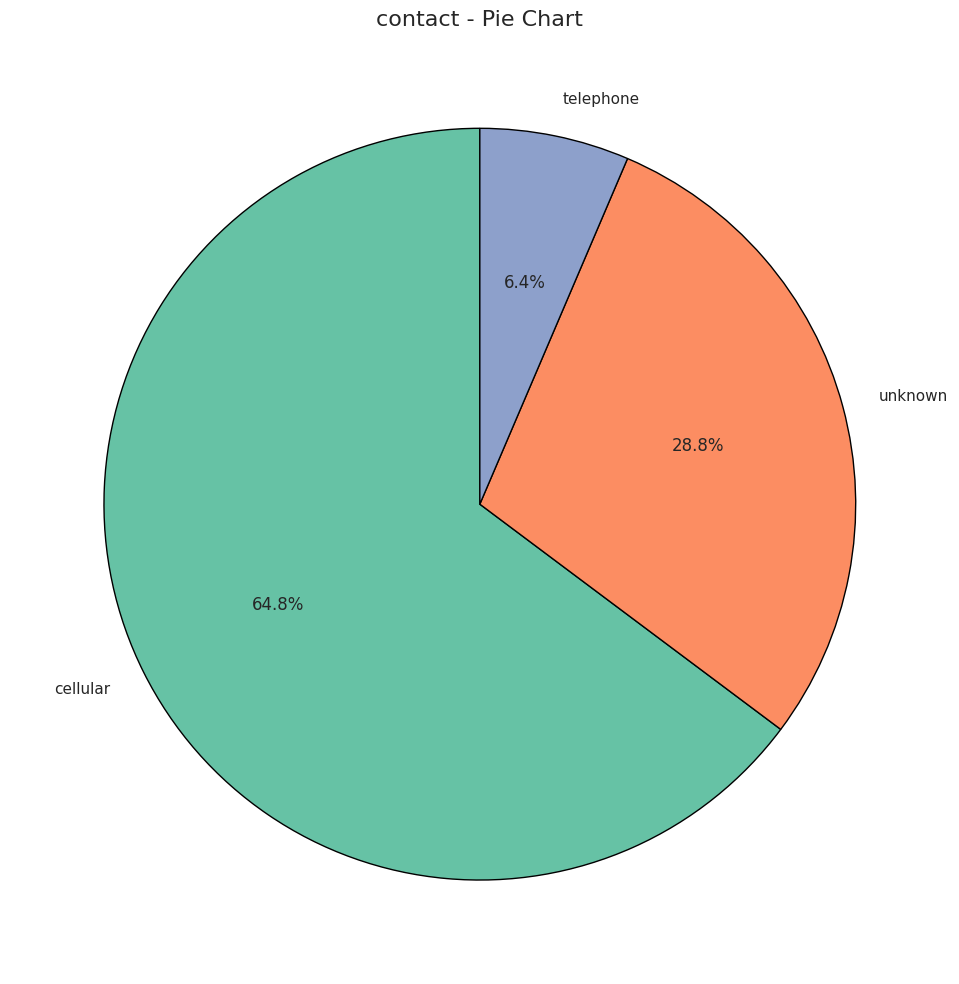

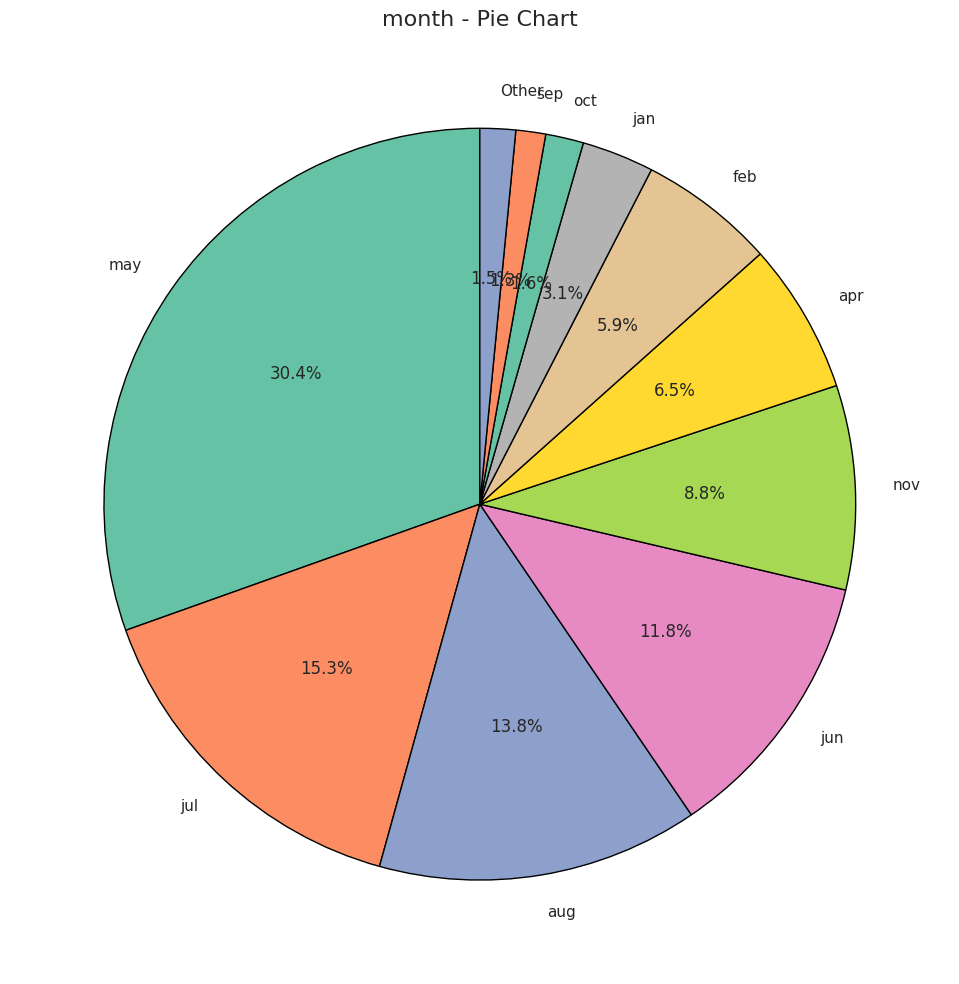

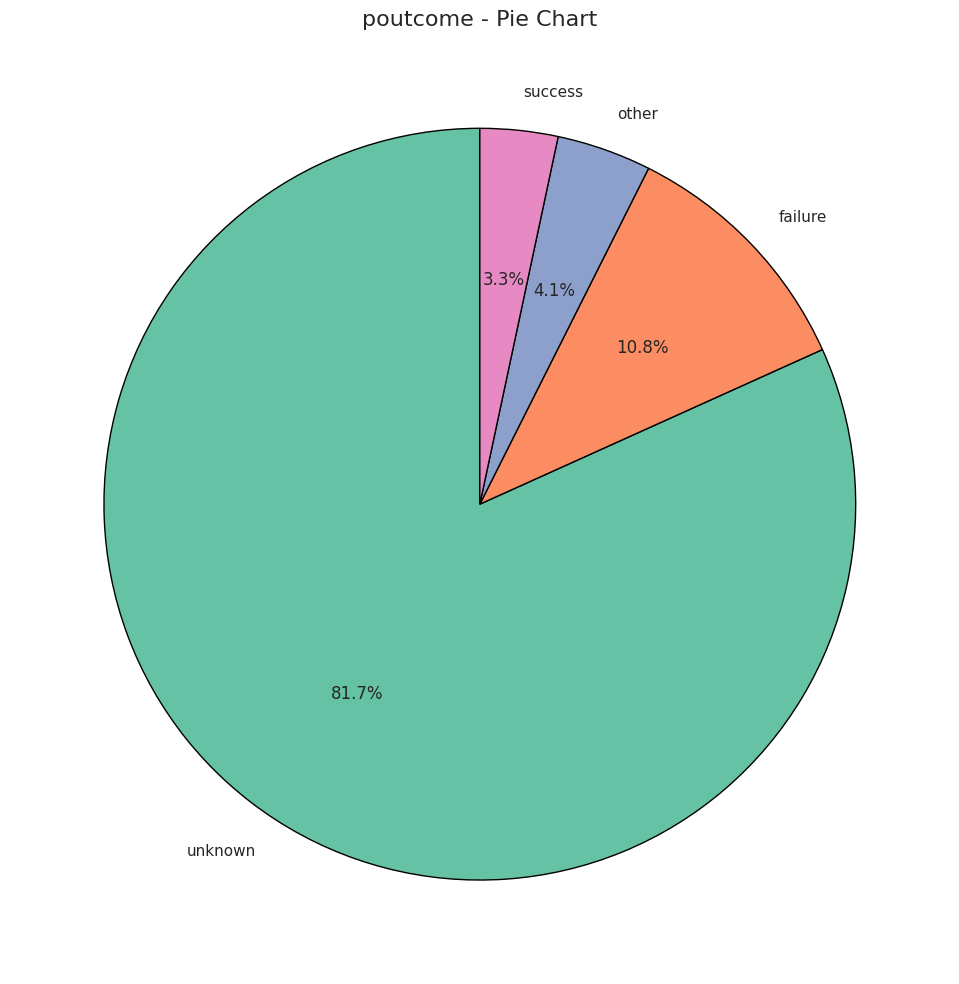

In [155]:
#Step 9
# -------------------------- Categorical Feature Distribution --------------------------
# Create bar plots for categorical features
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, 5 * len(categorical_cols)))

# Check if only one categorical feature is present
if len(categorical_cols) == 1:
    axes = [axes]

# Plot the distribution for each categorical feature
for i, col in enumerate(categorical_cols):
    sns.countplot(data=bank_data, x=col, ax=axes[i])
    axes[i].set_title(f"{col} Distribution", fontsize=16, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Count", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to make sure all plots fit well
plt.tight_layout()
plt.show()

# -------------------------- Pie Charts for Categorical Features --------------------------
# Plot pie charts for categorical features (with improved layout)
for col in categorical_cols:
    plt.figure(figsize=(8, 8))

    # Group small categories into 'Other'
    value_counts = bank_data[col].value_counts()
    if len(value_counts) > 10:  # Limit the number of categories to prevent clutter
        other_category_count = value_counts[10:].sum()
        value_counts = value_counts[:10]
        value_counts['Other'] = other_category_count

    # Plot the pie chart with improved aesthetics
    value_counts.plot.pie(autopct='%1.1f%%',
                          colors=sns.color_palette('Set2', n_colors=len(value_counts)),
                          startangle=90,
                          wedgeprops={'edgecolor': 'black'},  # Adds borders to the wedges for clarity
                          figsize=(10, 10))

    plt.title(f"{col} - Pie Chart", fontsize=16)
    plt.ylabel('')  # Remove the y-label
    plt.tight_layout()  # Ensure the layout is tight and labels fit
    plt.show()

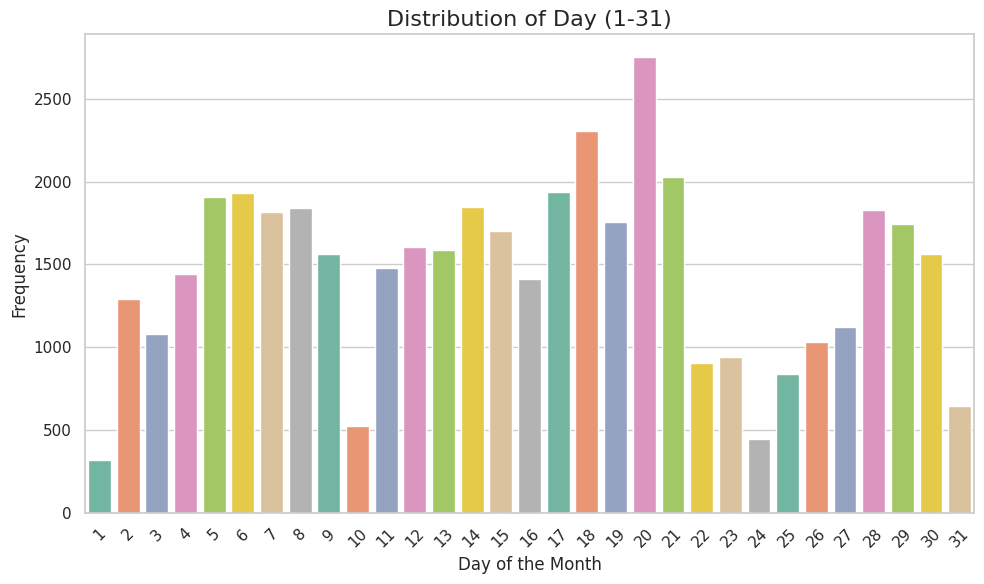

In [156]:
# Step 9: Analyze 'day' Feature Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=bank_data, hue='day', palette='Set2', legend=False)
plt.title("Distribution of Day (1-31)", fontsize=16)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Outlier Detection with Boxplots

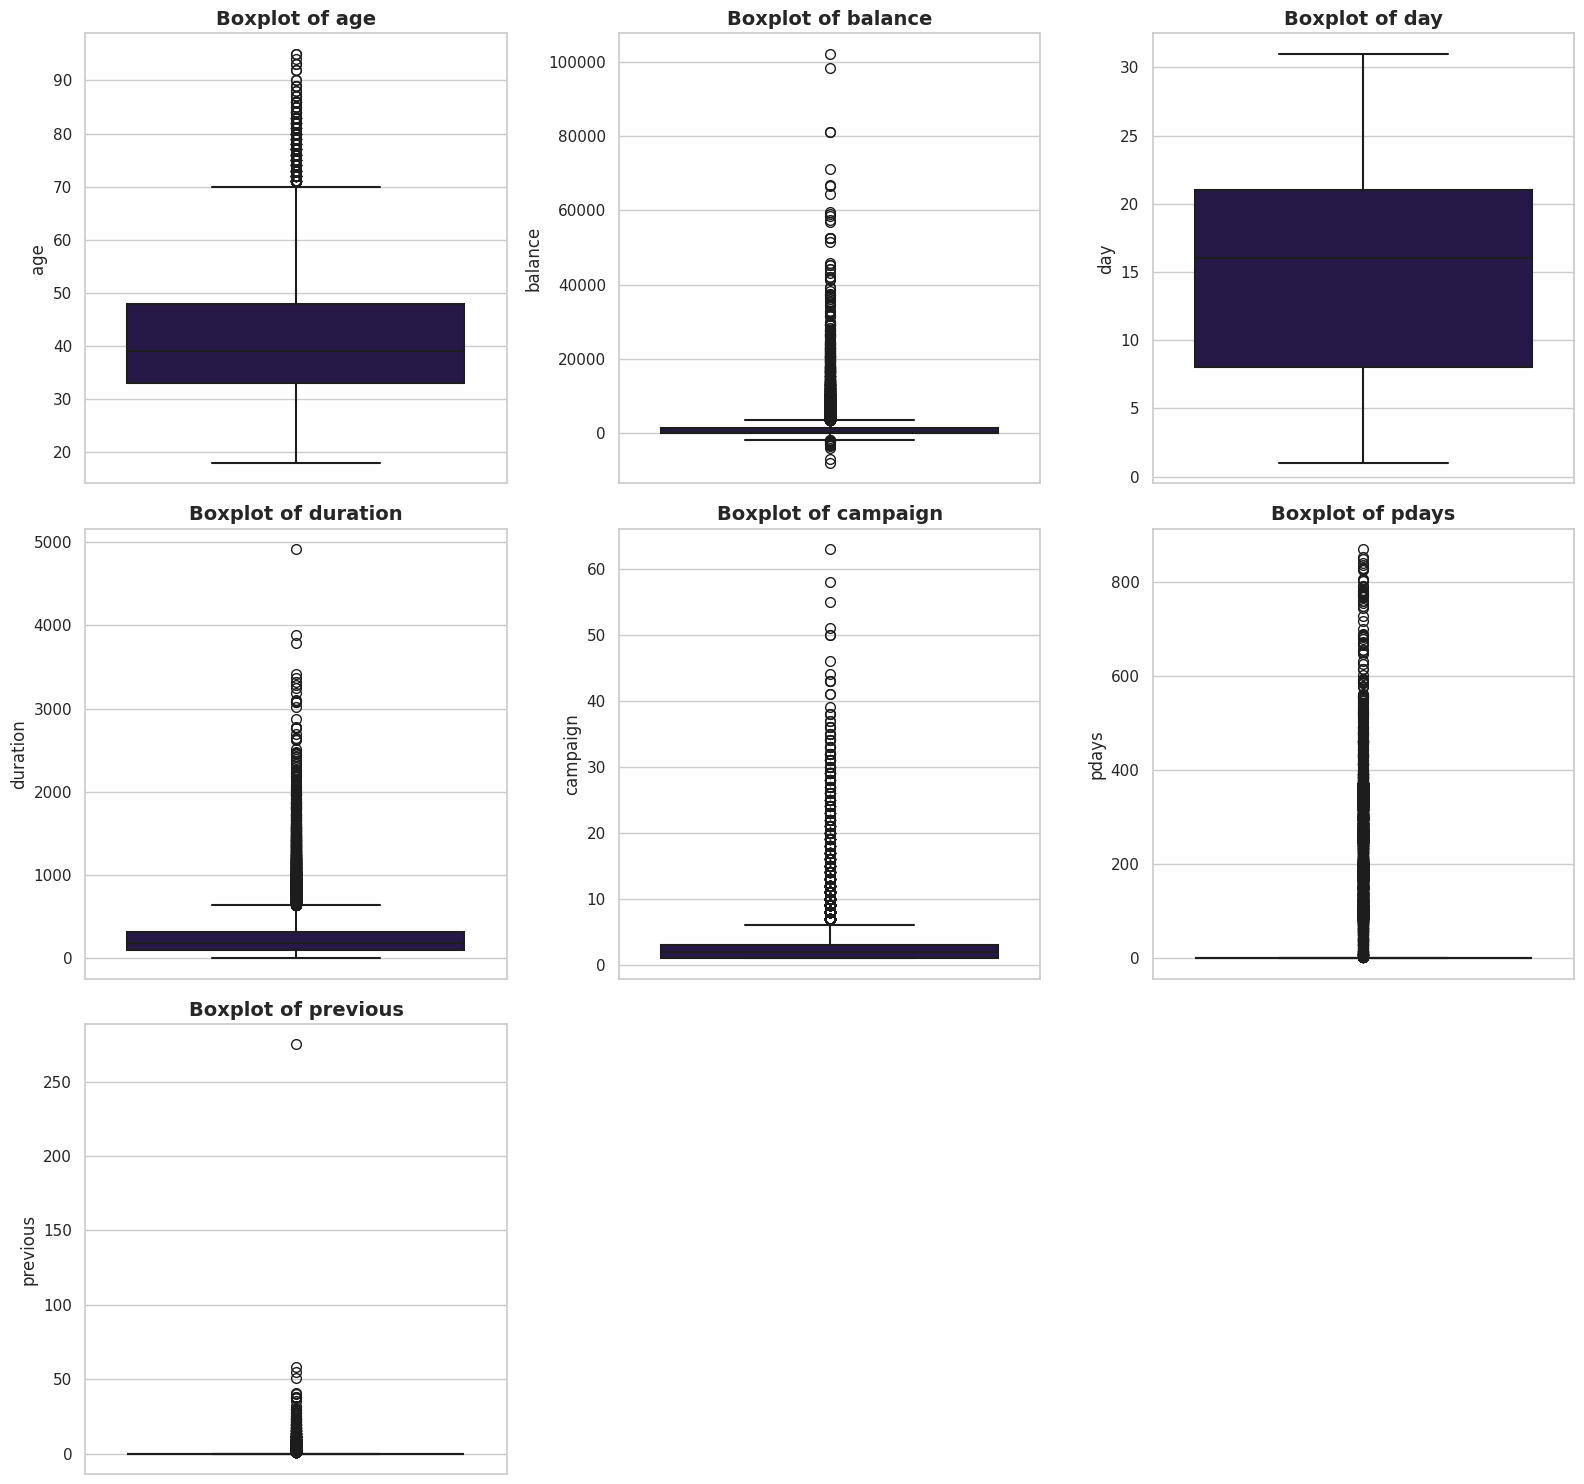

In [157]:
# Step 10: Outlier Detection (Boxplots)

# Dynamically calculate the number of rows and columns for subplots
num_features = len(numeric_cols)
cols = 3  # Number of columns for the grid
rows = math.ceil(num_features / cols)  # Calculate rows dynamically

# Create a figure and axes
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 5))
axes = axes.flatten()  # Flatten to make indexing easier

# Set a color palette for boxplots (using default or "magma" without hue)
palette = "magma"  # A visually appealing color palette for outlier detection

# Plot a boxplot for each numerical feature
for i, feature in enumerate(numeric_cols):
    sns.boxplot(data=bank_data, y=feature, ax=axes[i], color=sns.color_palette(palette)[0], fliersize=7, linewidth=1.5)
    axes[i].set_title(f"Boxplot of {feature}", fontsize=14, weight='bold')
    axes[i].set_xlabel("")
    axes[i].set_ylabel(feature, fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off axes for unused subplots (if there are any)
for j in range(num_features, len(axes)):
    axes[j].axis('off')

# Adjust layout for better spacing and readability
plt.tight_layout()
plt.show()


Correlation Analysis for Numerical Features

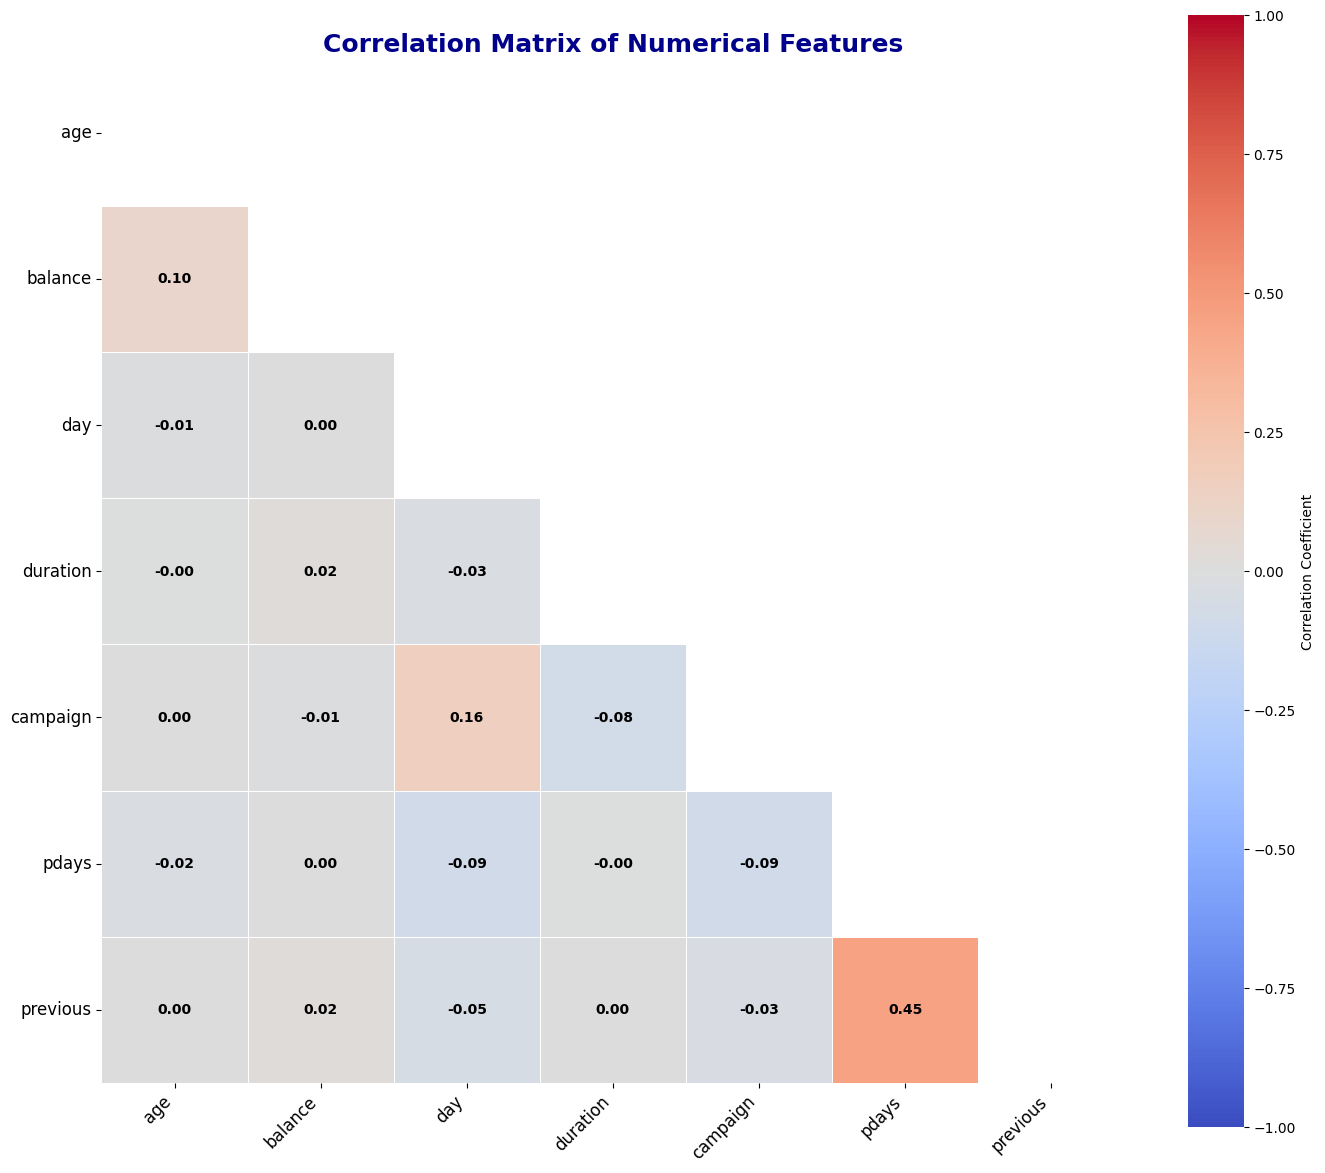

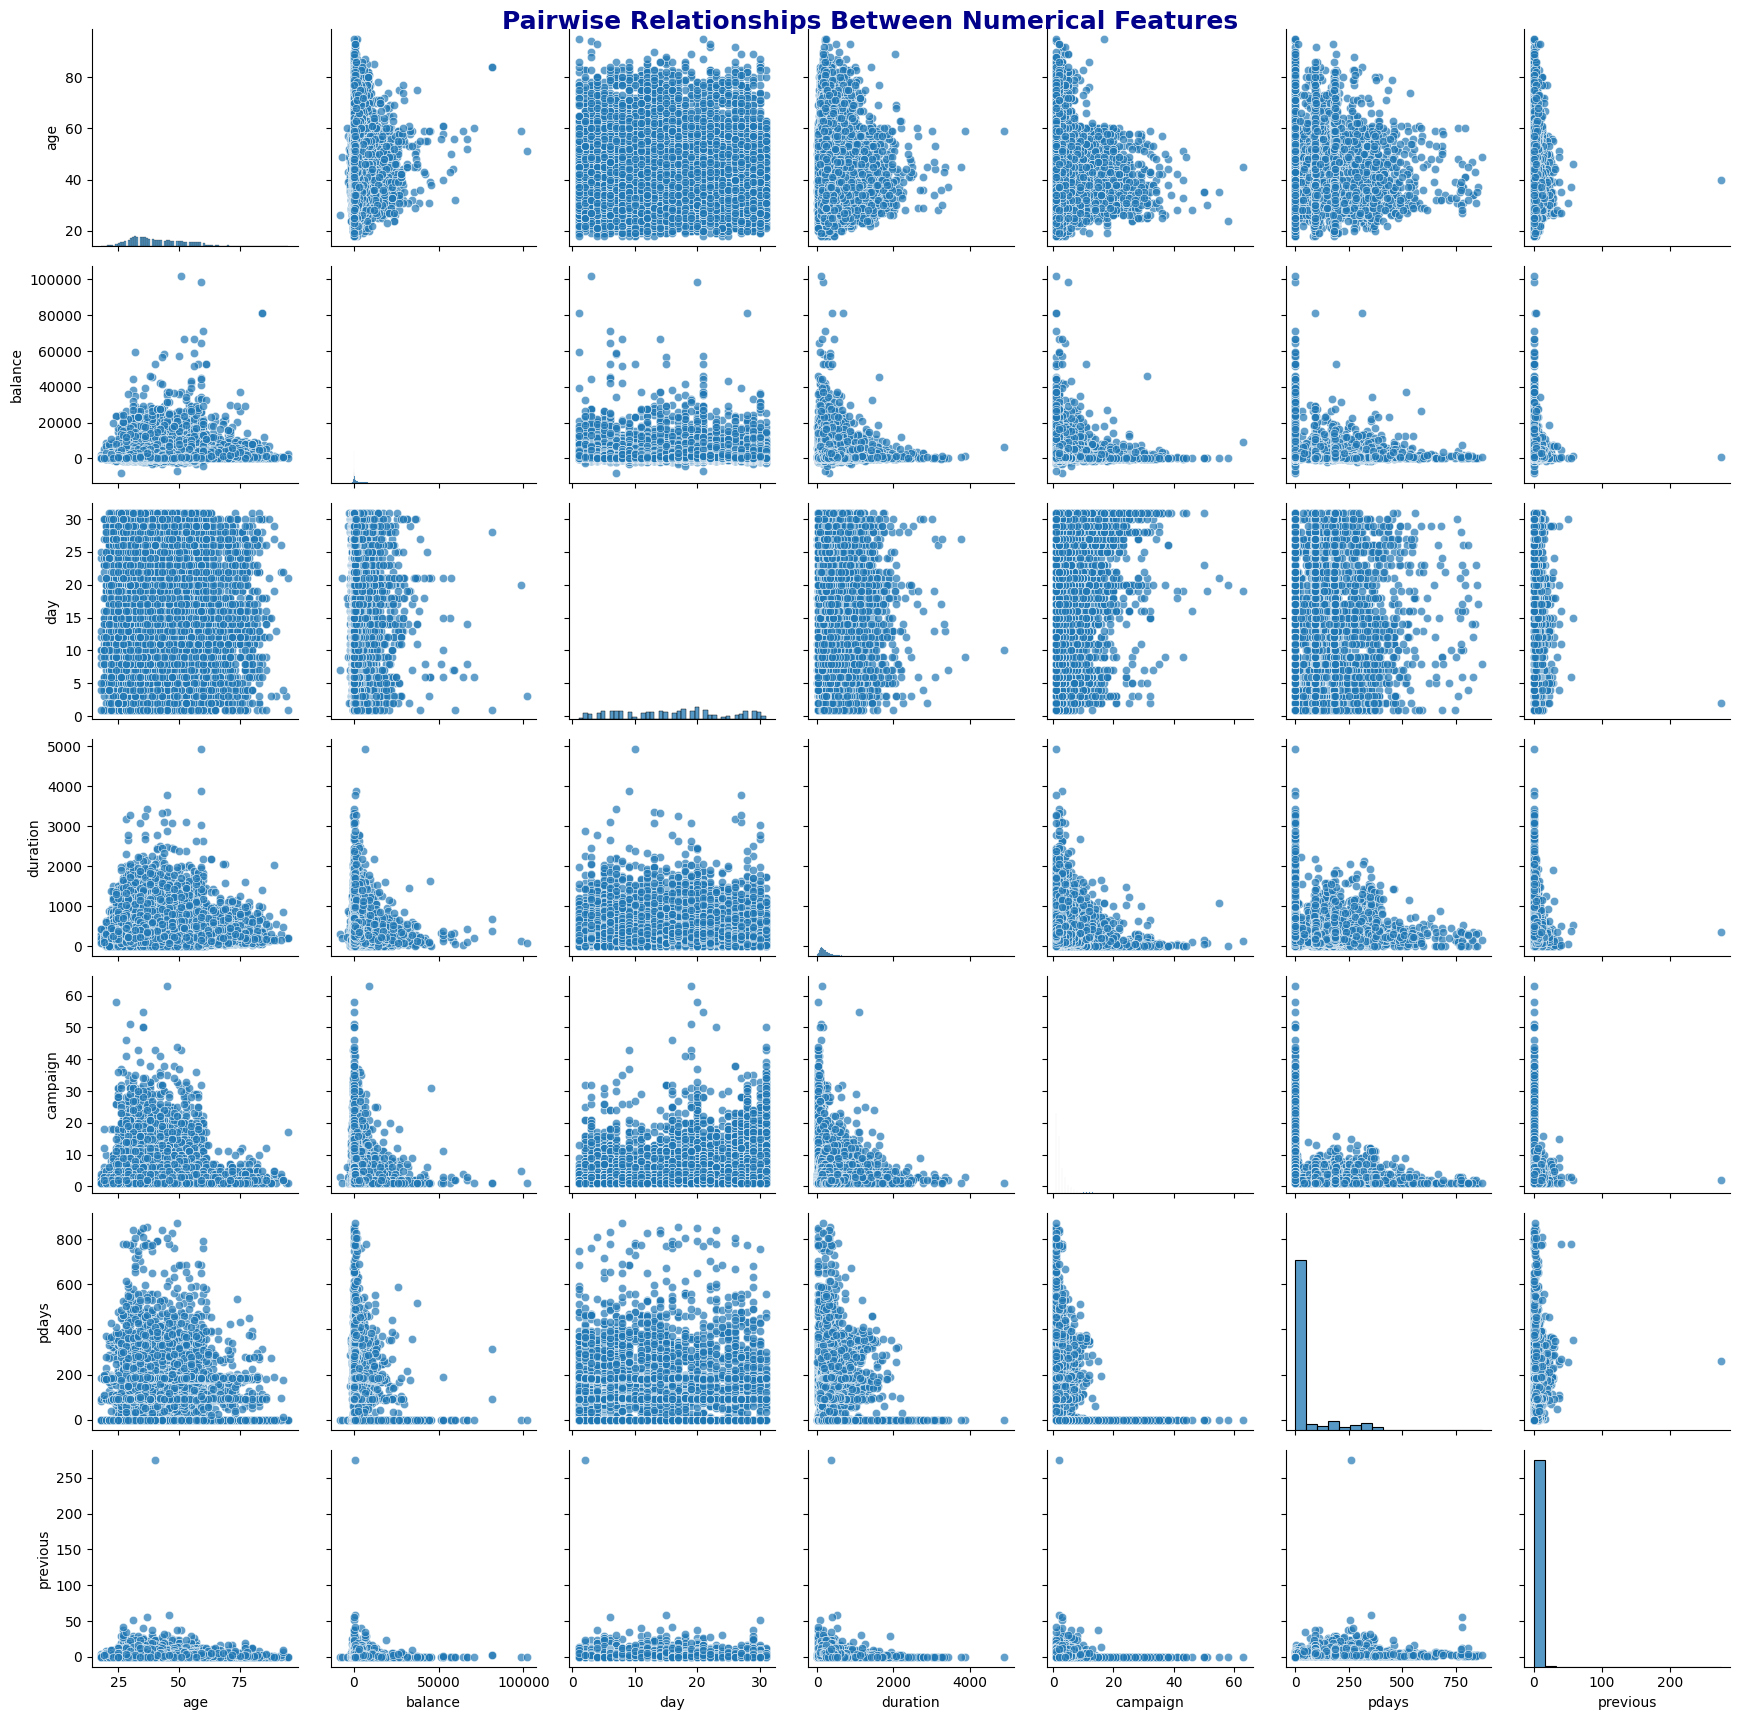

In [11]:
# Compute the correlation matrix
corr_matrix = bank_data[numeric_cols].corr(method='pearson')

# Create a figure with size
plt.figure(figsize=(14, 12))

# Advanced heatmap plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'}, annot_kws={'size': 10, 'weight': 'bold', 'color': 'black'},
            square=True, mask=np.triu(corr_matrix), center=0)

# Title and axis customization
plt.title('Correlation Matrix of Numerical Features', fontsize=18, weight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

# Optional: Pairwise plot for selected features (just to get a sense of relationships)
sns.pairplot(bank_data[numeric_cols], kind="scatter", plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships Between Numerical Features', fontsize=18, weight='bold', color='darkblue')
plt.tight_layout()
plt.show()

In [12]:
print(categorical_cols)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')


FOR ALL VARIABLES

In [13]:
# Create a label encoder
label_encoder = LabelEncoder()

# Store the original labels in a dictionary
label_mappings = {}

# Encode categorical features, including the target variable 'y', to numeric
categorical_cols_with_target = categorical_cols.tolist() + ['y'] # Include target 'y'

for column in categorical_cols_with_target:  # Loop includes 'y' now
    label_encoder.fit(bank_data[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
    bank_data[column] = label_encoder.transform(bank_data[column])

# Now calculate the correlation matrix for all variables
correlation_matrix = bank_data.corr()

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of All Variables")
plt.show()


 Cramér's V for Categorical Features

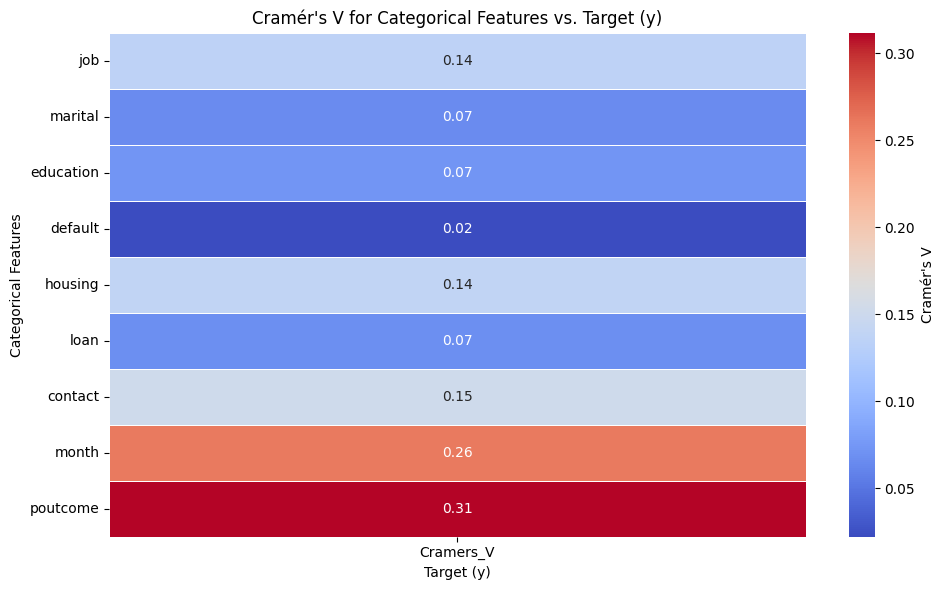

In [14]:
# Cramér's V calculation function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, p_val, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1)) if chi2_stat > 0 else 0

# Initialize a dictionary to store Cramér's V values for each feature
cramers_v_values = {}

# Calculate Cramér's V for each categorical feature against the target 'y'
for col in categorical_cols:
    cramers_v_values[col] = cramers_v(bank_data[col], bank_data['y'])

# Convert the dictionary to a DataFrame for easy plotting
cramers_v_df = pd.DataFrame(cramers_v_values, index=['Cramers_V']).T  # Transpose for heatmap

# Plotting the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.heatmap(cramers_v_df, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={'label': "Cramér's V"})
plt.title("Cramér's V for Categorical Features vs. Target (y)")
plt.xlabel("Target (y)")  # Since we transposed, 'y' is now on the x-axis
plt.ylabel("Categorical Features")
plt.tight_layout()
plt.show()

Check for Duplicate Records

In [15]:
# Step 1: Find fully duplicated rows by comparing all columns
duplicates_all_columns = bank_data[bank_data.duplicated(keep=False)]

# Step 2: Show the total number of fully duplicated records
total_duplicates = duplicates_all_columns.shape[0]
print(f"Total number of fully duplicated records: {total_duplicates}")

# Step 3: If you want to display the first few fully duplicated records for inspection
if total_duplicates > 0:
    print("\nFirst few fully duplicated records:")
    print(duplicates_all_columns.head())

Total number of fully duplicated records: 0


Target Class Distribution

In [16]:
# Count and percentage distribution of target classes
target_counts = bank_data['y'].value_counts()
target_percentage = target_counts / len(bank_data) * 100  # More efficient calculation

# Display results (unchanged)
print("Target Value Counts:")
print(target_counts)
print("\nTarget Proportions (%):")
print(target_percentage)

# Visualize the target class distribution with enhancements
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")  # Enhanced color palette
plt.title("Target Class Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Target Classes", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({(p.get_height() / len(bank_data) * 100):.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Target Value Counts:
y
0    39922
1     5289
Name: count, dtype: int64

Target Proportions (%):
y
0    88.30152
1    11.69848
Name: count, dtype: float64


<ipython-input-16-9b10dc280ec7>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette="viridis")  # Enhanced color palette


Feature Relationship with Target Variable

A. Categorical Features

In [18]:
# Create subplots dynamically
import math
rows = math.ceil(len(categorical_cols) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# Advanced color palette
palette = "plasma"  # or "magma", "plasma", "inferno", etc.

# Plot relationships for each categorical feature using a stacked bar plot with a different color palette
for i, feature in enumerate(categorical_cols):
    cross_tab = pd.crosstab(bank_data[feature], bank_data['y'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[i], colormap=palette)  # Applying the color palette here
    axes[i].set_title(f"Subscription Proportion by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Proportion")
    axes[i].tick_params(axis='x', rotation=45)

    # Adding annotations for clarity (optional)
    for p in axes[i].patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        axes[i].annotate(f'{height:.2f}', (x + width/2, y + height/2), ha='center', va='center')

# Turn off unused axes
for j in range(len(categorical_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

B. Numerical Features

<ipython-input-26-36962eb3445b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette=palette)  # Applying the palette
<ipython-input-26-36962eb3445b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette=palette)  # Applying the palette
<ipython-input-26-36962eb3445b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette=palette)  # Applying the palette
<ipython-input-26-36962eb3445b>:11: Futu

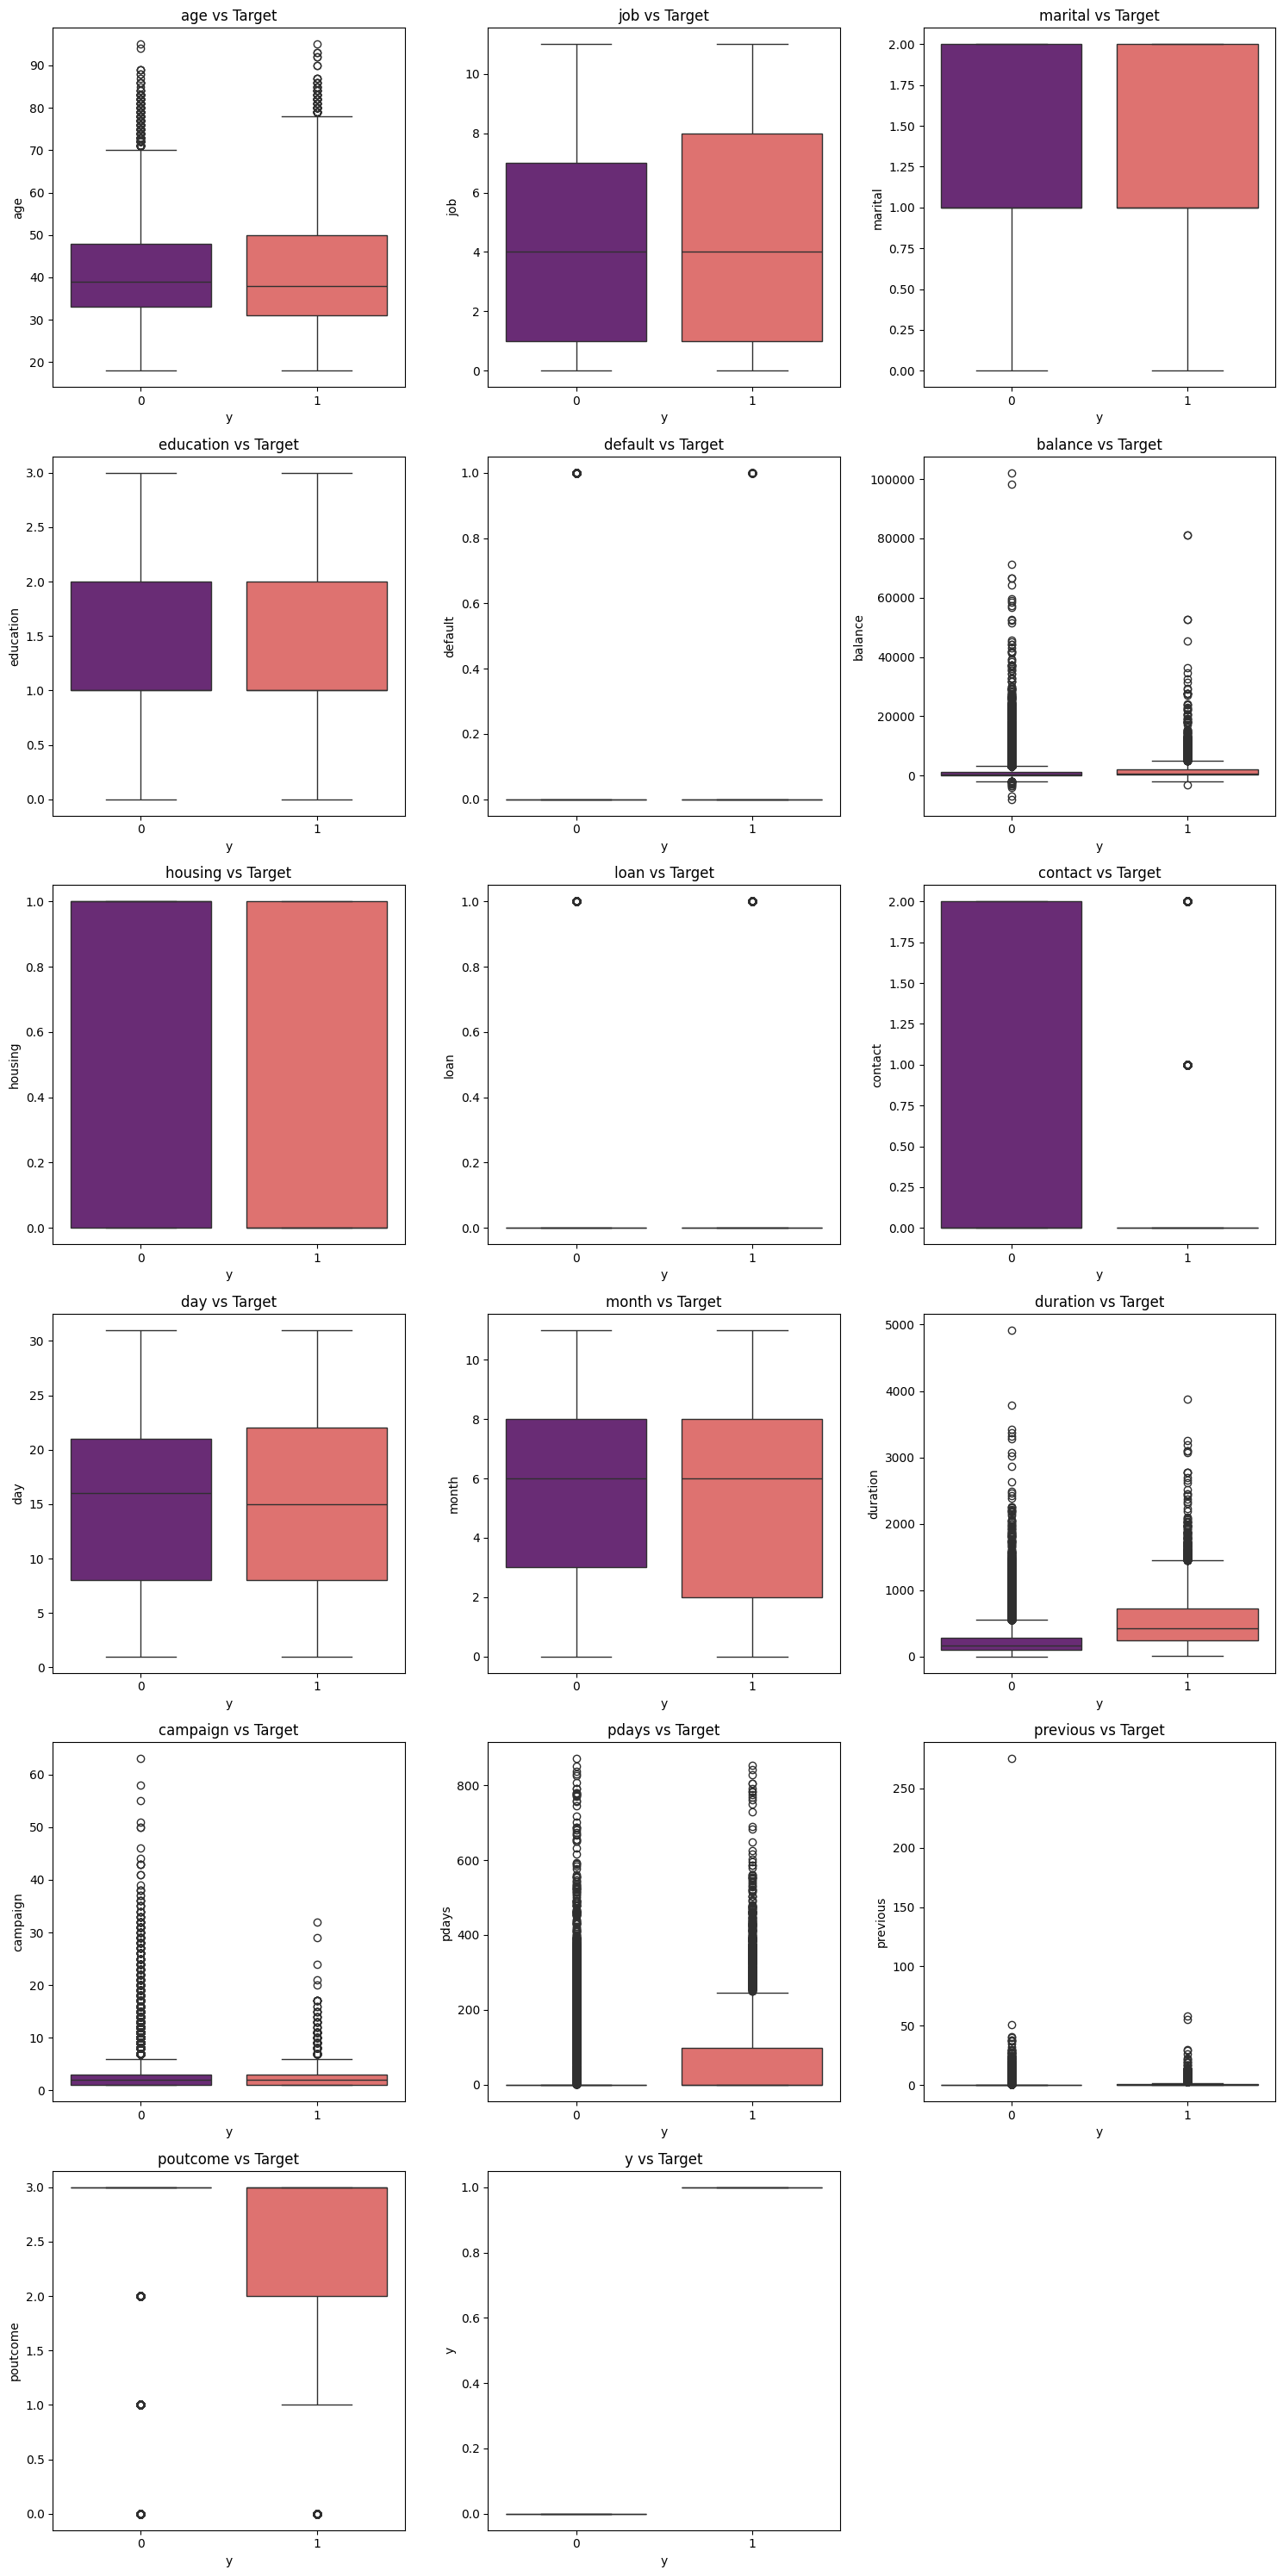

In [26]:
# Create subplots dynamically
rows = math.ceil(len(numeric_cols) / 3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# Advanced color palette (using 'viridis' as an example)
palette = "magma"  # or "magma", "plasma", "inferno", etc.

# Plot relationships for numerical features with the enhanced color palette
for i, feature in enumerate(numeric_cols):
    sns.boxplot(data=bank_data, x='y', y=feature, ax=axes[i], palette=palette)  # Applying the palette
    axes[i].set_title(f"{feature} vs Target")
    axes[i].set_xlabel("y")
    axes[i].set_ylabel(feature)

# Turn off unused axes
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Numerical Features: Correlation with Target

In [27]:
# Calculate the correlation matrix
correlation_matrix = bank_data[numeric_cols].corr()

# Check correlation with target 'y'
correlation_with_target = correlation_matrix['y']
print(f"Correlation of numerical features with target (y):\n{correlation_with_target}\n")

# Plot the correlation with target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title("Correlation of Numerical Features with Target (y)")
plt.xlabel("Numerical Features")
plt.ylabel("Correlation with Target (y)")
plt.xticks(rotation=45)
plt.show()

Correlation of numerical features with target (y):
age          0.025155
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.077840
y            1.000000
Name: y, dtype: float64



<ipython-input-27-866a5b90be31>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


Categorical Features: Association with Target using Cramér's V

In [30]:
# Cramér's V calculation function
def calculate_cramers_v(feature, target):
    contingency = pd.crosstab(feature, target)
    chi2, _, _, _ = chi2_contingency(contingency)
    n = contingency.sum().sum()
    phi2 = chi2 / n
    r, k = contingency.shape
    return np.sqrt(phi2 / (min(k - 1, r - 1))) if chi2 > 0 else 0


if len(categorical_cols_with_target) > 0:
    # Calculate Cramér's V for each categorical feature
    cramers_v_results = {
        feature: calculate_cramers_v(bank_data[feature], bank_data['y'])
        for feature in categorical_cols_with_target
    }

    # Convert the results to a DataFrame for visualization
    cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramér\'s V'])
    cramers_v_df.index.name = "Categorical Features"

    # Plot the results as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        cramers_v_df,
        annot=True,
        cmap='coolwarm',
        cbar=True,
        fmt=".2f"
    )
    plt.title("Cramér's V - Categorical Features vs Target")
    plt.xlabel("Cramér's V Value")
    plt.ylabel("Categorical Features")
    plt.show()
else:
    print("No categorical features found for Cramér's V calculation.")

# Feature Engineering

1. Handle Unknown Values

In [31]:
for column in bank_data.select_dtypes(include=['object']).columns:  # Iterate through categorical columns
    # Calculate the mode (most frequent value)
    mode_value = bank_data[column].mode()[0]

    # Replace unknown values (e.g., 'unknown', '?', etc.) with the mode
    bank_data[column] = bank_data[column].replace(['unknown', '?'], mode_value)

# For numerical features with unknown values (e.g., represented by -1, 999, etc.),
# you can replace them with the mean or median:
for column in bank_data.select_dtypes(include=['number']).columns:
    # Calculate the median (or mean)
    median_value = bank_data[column].median()  # Or use bank_data[column].mean()

    # Replace unknown values (e.g., -1) with the median
    bank_data[column] = bank_data[column].replace([-1, 999], median_value)  # Replace -1, 999 with your specific unknown value representations

2. Handle Outliers

In [32]:
# Assuming 'numeric_cols' contains your numerical feature columns

# Using the Interquartile Range (IQR) method to handle outliers
for column in numeric_cols:
    Q1 = bank_data[column].quantile(0.25)
    Q3 = bank_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers: Values outside the bounds are replaced with the bounds
    bank_data[column] = np.clip(bank_data[column], lower_bound, upper_bound)

3. Feature Selection

In [33]:
# Using correlation-based feature selection for numerical features
# (You can also explore other methods like mutual information, chi-squared, etc.)

# Calculate the correlation matrix (already done in previous steps)
correlation_matrix = bank_data[numeric_cols].corr()

# Set a correlation threshold (e.g., 0.7)
threshold = 0.7

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features (keep one from each highly correlated pair)
selected_features = numeric_cols.difference(highly_correlated_features)

# Now, 'selected_features' contains the selected numerical features

In [44]:
# Assuming 'X' contains your features and 'y' contains your target variable
from sklearn.model_selection import train_test_split

# Perform train-test split with stratification BEFORE feature scaling and encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

4. Feature Scaling

In [45]:
# Using StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bank_data[selected_features] = scaler.fit_transform(bank_data[selected_features])  # Apply scaling to selected numerical features

5. Categorical Encoding

In [46]:
# Using One-Hot Encoding for categorical features
# Assuming 'categorical_cols' contains your categorical feature columns

bank_data = pd.get_dummies(bank_data, columns=categorical_cols, drop_first=True)  # drop_first to avoid multicollinearity

6. Train Test Split

In [41]:
# Assuming 'X' contains your features and 'y' contains your target variable
from sklearn.model_selection import train_test_split

# Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Explanation of parameters:
# - X: Your feature matrix (DataFrame or NumPy array)
# - y: Your target variable (Series or NumPy array)
# - test_size: Proportion of the dataset to include in the test split (e.g., 0.2 for 20%)
# - random_state: Controls the shuffling applied to the data before applying the split (for reproducibility)
# - stratify: Specifies the variable to use for stratified sampling (in this case, 'y' to ensure class proportions are maintained)

In [42]:
print(y_train.value_counts())  # This will show the frequency of each class in your training target variable

y
0.0    36168
Name: count, dtype: int64


7. Handle Class Imbalance

In [47]:
# Apply SMOTE (if needed) ONLY to the training data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)  # Adjust random_state as needed
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now use X_train_resampled and y_train_resampled for training your model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead